# Plotting record temperatures for New Orleans over the period 2005-2015
## Aashita Kesarwani

This project is taken from assignment for the second week of the online course *Applied Plotting, Charting & Data Representation in Python * (https://www.coursera.org/learn/python-plotting).

National Oceanic and Atmospheric Administration(NOAA) dataset has been stored in the file `data_temperatures_nola.csv`. The data contains daily climate records coming from the 12 stations of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily)  near **New Orleans, Louisiana, United States** over the period from Jan 01, 2005 to Dec 31, 2015. 

Each row in the datafile corresponds to a single observation. There are four columns in the datafile as follows:
* **ID** : station identification code
* **Date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **Element** : indicator of element type
    * TMAX : Maximum temperature 
    * TMIN : Minimum temperature 
* **Data_Value** : data value for element (tenths of degrees C)

The code is written for Python 3.6. Though it runs for Python 2 versions, the visuals, especially the colors that are taken from the Google Material Design color palette, are less appealing.

In [7]:
import pandas as pd
import numpy as np
filename = "data_temperatures_nola.csv"
df = pd.read_csv(filename) # Reads the data from the csv file into pandas dataframe
# The dataframe has temperatures for New Orleans from multiple locations in the city and taken at multiple times of the day 
# from Jan 01, 2005 to Dec 31, 2015.
# Temperatures are given at tenths of degrees celsius.

# The following is preparing the dataframe to extract the desired data
df.loc[:,'Data_Value'] *= 0.1 # Dividing all temperature entries by 10 to convert them to degree celsius
df['Date'] = pd.to_datetime(df['Date']) # Changing the dtype of the date to pandas datetime 

# Setting up the sorted multi-index consisting of month and days so as to help grouping rows later for each day of the year
df['Day'] = pd.DatetimeIndex(df['Date']).day 
df['Month'] = pd.DatetimeIndex(df['Date']).month 
df = df.set_index(['Month','Day']) 
df.sort_index(inplace = True)

# Discarding all the entries for 29th Feb of any year; only 365 days of the year are considered for plotting purpose
selected_df = df.loc[2,29] 
df = df[~df.index.isin(selected_df.index)] 

# Splitting dataframes into two - one for 2005-2014 and another for 2015
df['Year'] = pd.DatetimeIndex(df['Date']).year
df_2015 = df[df['Year'] == 2015] 
df = df[df['Year'] != 2015] 

# Creating two dataframes for 2005-2014 - one each for max and min
max_temp_df = df[df['Element'] == 'TMAX'] 
min_temp_df = df[df['Element'] == 'TMIN'] 

# The following gives pandas series with 365 entries corresponding to the max/min temperatures over the decade 2005-2014
# for each day of the year
max_temp = max_temp_df.groupby(level = ['Month', 'Day'])['Data_Value'].max()  
min_temp = min_temp_df.groupby(level = ['Month', 'Day'])['Data_Value'].min()

# Creating two dataframes for 2015 - one each for max and min
max_temp_df_2015 = df_2015[df_2015['Element'] == 'TMAX']
min_temp_df_2015 = df_2015[df_2015['Element'] == 'TMIN'] 

# The following gives dataframes with 365 rows corresponding to the max/min temperatures for each day of the year 2015 
# and two columns in total viz one for temperature values and another for dates stored as the pandas datatime object  
max_temp_df_2015 = max_temp_df_2015.groupby(level = ['Month', 'Day']).max()[['Data_Value', 'Date']]
min_temp_df_2015 = min_temp_df_2015.groupby(level = ['Month', 'Day']).min()[['Data_Value', 'Date']]

# Need 365 days array for plotting in pandas datetime format; year does not matter so taken 2015 for convenience
date_range = df_2015['Date'].unique() 

<IPython.core.display.Javascript object>


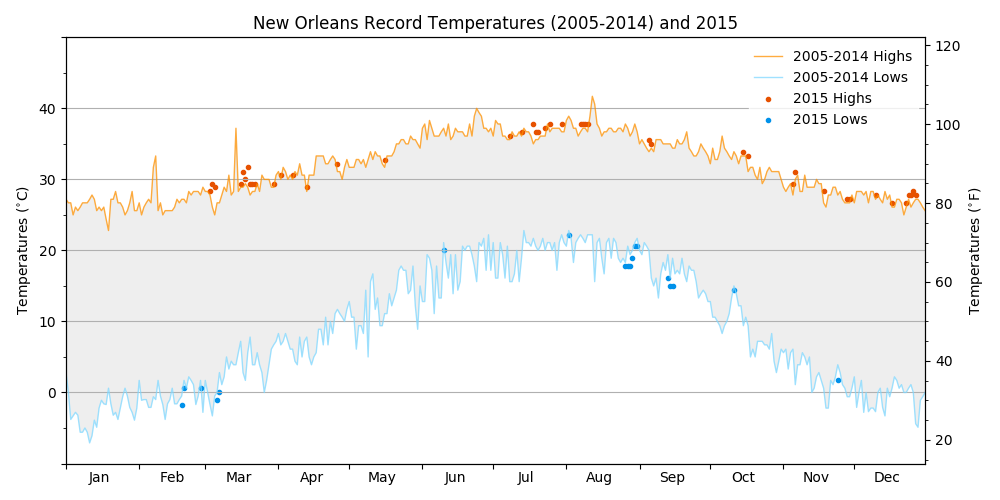

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
% matplotlib notebook

# Creating figure and an axis
fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (10,5) ) 
ax.set_title('New Orleans Record Temperatures (2005-2014) and 2015') # Setting the title
ax.yaxis.grid() # Setting up the horizontal grid lines in the background

# Plotting graphs for record high and low temperatures for each day of the year over the period 2005-2014 
# and filling in between region
# Google Material Design color palette (https://material.io/guidelines/style/color.html) is used below: 
plt.plot(date_range, max_temp.values, '#FF9100', linewidth = 1, alpha=0.75, label = '2005-2014 Highs')
plt.plot(date_range, min_temp.values, '#80D8FF', linewidth = 1, alpha=0.75, label = '2005-2014 Lows') 
plt.fill_between(date_range, min_temp, max_temp, facecolor='#EEEEEE')

# Adding semi-transparent legend with no make the border for above two line plots
plt.legend(loc = 1).get_frame().set_edgecolor('white') 
# Labels for the legends of scatter plots below
my_label_max = "2015 Highs"
my_label_min = "2015 Lows"

# Plotting record breaking temperatures from the year 2015 
for idx, rows in max_temp_df_2015.iterrows():
    if rows['Data_Value'] > max_temp.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], c = '#E65100', marker = '.', label = my_label_max)
        my_label_max = "_nolegend_" # To avoid duplicate labels in the legend
for idx, rows in min_temp_df_2015.iterrows():
    if rows['Data_Value'] < min_temp.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], c = '#0091EA', marker = '.', label = my_label_min)
        my_label_min = "_nolegend_"

ax.legend(loc = 1).get_frame().set_edgecolor('white') # Adding the labels for the max and min points to the above legend 

# Setting the limits for x-axis to fit the dates perfectly
xmin, xmax = date_range[0], date_range[-1]
ax.set_xlim(xmin, xmax)

# Locating 12 ticks for the 15th of each month on x-axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

# Setting ticks for each of the 12 months on x-axis
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# Putting month labels in between the above set ticks
xticks = ax.xaxis.get_minor_ticks()
for xtick in xticks:
    xtick.tick1line.set_markersize(0)
    xtick.tick2line.set_markersize(0)
    xtick.label1.set_horizontalalignment('center')

# The following is to set up the left y-axis for temperatures in Celsius
ax.set_ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis

# Setting the temperature limits for y-axis from -10 to 50 degrees Celsius
ymin, ymax = -10, 50
ax.set_ylim(ymin, ymax) 

yticks = ax.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False) # Making 50 degrees Celsius disappear to make the graph look cleaner
yticks[1].label1.set_visible(False) # Making -10 degrees Celsius disappear to make the graph look cleaner
ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) # Putting major ticks at every 10 degrees Celsius
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5)) # Putting minor ticks at every 5 degrees Celsius

# The following is to set up the right y-axis for temperatures in Fahrenheit
ax2 = ax.twinx() # Create a twin y-axis sharing the x-axis with the previous y-axis
ax2.set_ylabel('Temperatures $(^{\circ}$F)') # Setting label for y-axis
def C_to_F(temp_c): # Celsius to Fahrenheit  
    return 9/5 *temp_c + 32
ax2.set_ylim(C_to_F(ymin), C_to_F(ymax)) # (ymin, ymax) are defined above
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))  # Putting major ticks at every 20 degrees Fahrenheit
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))  # Putting major ticks at every 5 degrees Fahrenheit

fig.tight_layout() # To make the graph fit perfectly
# fig.savefig('foo.png', bbox_inches='tight')   # save the figure to file; comment % matplotlib notebook before using this option
# plt.close(fig)